# Dealing with high dimensionality


## Preparing the database

In [49]:
import pandas as pd

In [50]:
dados = pd.read_csv('/content/exames.csv')
dados.sample(5)

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.30010,...,184.60,2019.0,0.1622,0.66560,0.71190,0.786,0.26540,0.4601,0.11890,NaN
324,89511501,B,12.20,15.21,78.01,103.78,457.9,0.08673,0.06545,0.01994,...,91.11,583.1,0.1256,0.19280,0.11670,0.786,0.05556,0.2661,0.07961,NaN
164,8712289,M,23.27,22.04,152.10,103.78,1686.0,0.08439,0.11450,0.13240,...,184.20,2403.0,0.1228,0.35830,0.39480,0.786,0.23460,0.3589,0.09187,NaN
440,909411,B,10.97,17.20,71.73,103.78,371.5,0.08915,0.11130,0.09457,...,90.14,476.4,0.1391,0.40820,0.47790,0.786,0.15550,0.2540,0.09532,NaN
429,90769602,B,12.72,17.67,80.98,103.78,501.3,0.07896,0.04522,0.01402,...,88.87,586.8,0.1068,0.09605,0.03469,0.786,0.03612,0.2165,0.06025,NaN


In [51]:
dados.info()
# Dados nulos em MUITA QUANTIDADE
# Dessa forma, a melhor coisa a se fazer é retirar essa coluna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           569 non-null    int64  
 1   diagnostico  569 non-null    object 
 2   exame_1      569 non-null    float64
 3   exame_2      569 non-null    float64
 4   exame_3      569 non-null    float64
 5   exame_4      569 non-null    float64
 6   exame_5      569 non-null    float64
 7   exame_6      569 non-null    float64
 8   exame_7      569 non-null    float64
 9   exame_8      569 non-null    float64
 10  exame_9      569 non-null    float64
 11  exame_10     569 non-null    float64
 12  exame_11     569 non-null    float64
 13  exame_12     569 non-null    float64
 14  exame_13     569 non-null    float64
 15  exame_14     569 non-null    float64
 16  exame_15     569 non-null    float64
 17  exame_16     569 non-null    float64
 18  exame_17     569 non-null    float64
 19  exame_18

In [52]:
del dados['exame_33']

In [53]:
# dados.info() # Sem dados nulos
dados.head(10)

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.30010,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.08690,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.19740,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.24140,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.19800,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,103.78,477.1,0.12780,0.17000,0.15780,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.786,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,103.78,1040.0,0.09463,0.10900,0.11270,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.786,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,103.78,577.9,0.11890,0.16450,0.09366,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.786,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,103.78,519.8,0.12730,0.19320,0.18590,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.786,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,103.78,475.9,0.11860,0.23960,0.22730,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.786,0.2210,0.4366,0.20750


## Starting the machine learning

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score
from numpy import random 

In [55]:
SEED = 1231323
random.seed(SEED)

x = dados.drop(['id', 'diagnostico'], axis = 1)
y = dados[['diagnostico']]

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.3)

In [56]:
treino_x.head(10)

,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,...,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32
517,19.89,20.26,130.50,103.78,1214.0,0.10370,0.13100,0.14110,0.09431,0.1802,...,25.23,160.50,1646.0,0.1417,0.3309,0.4185,0.786,0.16130,0.2549,0.09136
301,12.46,19.89,80.43,103.78,471.3,0.08451,0.10140,0.06830,0.03099,0.1781,...,23.07,88.13,551.3,0.1050,0.2158,0.1904,0.786,0.07625,0.2685,0.07764
367,12.21,18.02,78.31,103.78,458.4,0.09231,0.07175,0.04392,0.02027,0.1695,...,24.04,93.85,624.6,0.1368,0.2170,0.2413,0.786,0.08829,0.3218,0.07470
445,11.99,24.89,77.61,103.78,441.3,0.10300,0.09218,0.05441,0.04274,0.1820,...,30.36,84.48,513.9,0.1311,0.1822,0.1609,0.786,0.12020,0.2599,0.08251
49,13.49,22.30,86.91,103.78,561.0,0.08752,0.07698,0.04751,0.03384,0.1809,...,31.82,99.00,698.8,0.1162,0.1711,0.2282,0.786,0.12820,0.2871,0.06917
216,11.89,18.35,77.32,103.78,432.2,0.09363,0.11540,0.06636,0.03142,0.1967,...,27.10,86.20,531.2,0.1405,0.3046,0.2806,0.786,0.11380,0.3397,0.08365
186,18.31,18.58,118.60,103.78,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,26.36,139.20,1410.0,0.1234,0.2445,0.3538,0.786,0.15710,0.3206,0.06938
190,14.22,23.12,94.37,103.78,609.9,0.10750,0.24130,0.19810,0.06618,0.2384,...,37.18,106.40,762.4,0.1533,0.9327,0.8488,0.786,0.17720,0.5166,0.14460
74,12.31,16.52,79.19,103.78,470.9,0.09172,0.06829,0.03372,0.02272,0.1720,...,23.21,89.71,611.1,0.1176,0.1843,0.1703,0.786,0.08660,0.2618,0.07609
163,12.34,22.22,79.85,103.78,464.5,0.10120,0.10150,0.05370,0.02822,0.1551,...,28.68,87.36,553.0,0.1452,0.2338,0.1688,0.786,0.08194,0.2268,0.09082


In [57]:
model = RandomForestClassifier(n_estimators=100)
model.fit(treino_x, treino_y)
predicao = model.predict(teste_x)

acuracia = accuracy_score(teste_y, predicao) * 100
recall = recall_score(teste_y, predicao, pos_label = 'M') * 100 # COnsiderei o maligno como sendo mais importante
print(f'A acurácia foi de {acuracia:.2f} % e o recall foi de {recall:.2f} %')

A acurácia foi de 94.74 % e o recall foi de 92.19 %


<ipython-input-57-5b2540464878>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(treino_x, treino_y)


Let's look at the Dummy to see if we done well

In [58]:
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler

In [59]:
SEED = 1231323
random.seed(SEED)

dummy = DummyClassifier(strategy = 'stratified')
dummy.fit(treino_x, treino_y)
predicoes_dummy = dummy.predict(teste_x)
acuracia = dummy.score(teste_y, predicoes_dummy) * 100
print(f'A acurácia foi de {acuracia:.2f} %')

dummy2 = DummyClassifier(strategy = 'most_frequent')
dummy2.fit(treino_x, treino_y)
predicoes_dummy2 = dummy.predict(teste_x)
acuracia2 = dummy.score(teste_y, predicoes_dummy2) * 100
print(f'A acurácia foi de {acuracia2:.2f} %')

A acurácia foi de 49.71 %
A acurácia foi de 55.56 %


The dummy went really bad... We went well

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (20,10))

In [61]:
dados_sem_id = dados.drop('id', axis = 1)
dados_plot = pd.melt(dados_sem_id, id_vars = 'diagnostico', var_name = 'exames', value_name = 'valores')
dados_plot.head(12)

,diagnostico,exames,valores
0,M,exame_1,17.99
1,M,exame_1,20.57
2,M,exame_1,19.69
3,M,exame_1,11.42
4,M,exame_1,20.29
5,M,exame_1,12.45
6,M,exame_1,18.25
7,M,exame_1,13.71
8,M,exame_1,13.00
9,M,exame_1,12.46


## Creating a violin plot

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 <a list of 32 Text major ticklabel objects>)

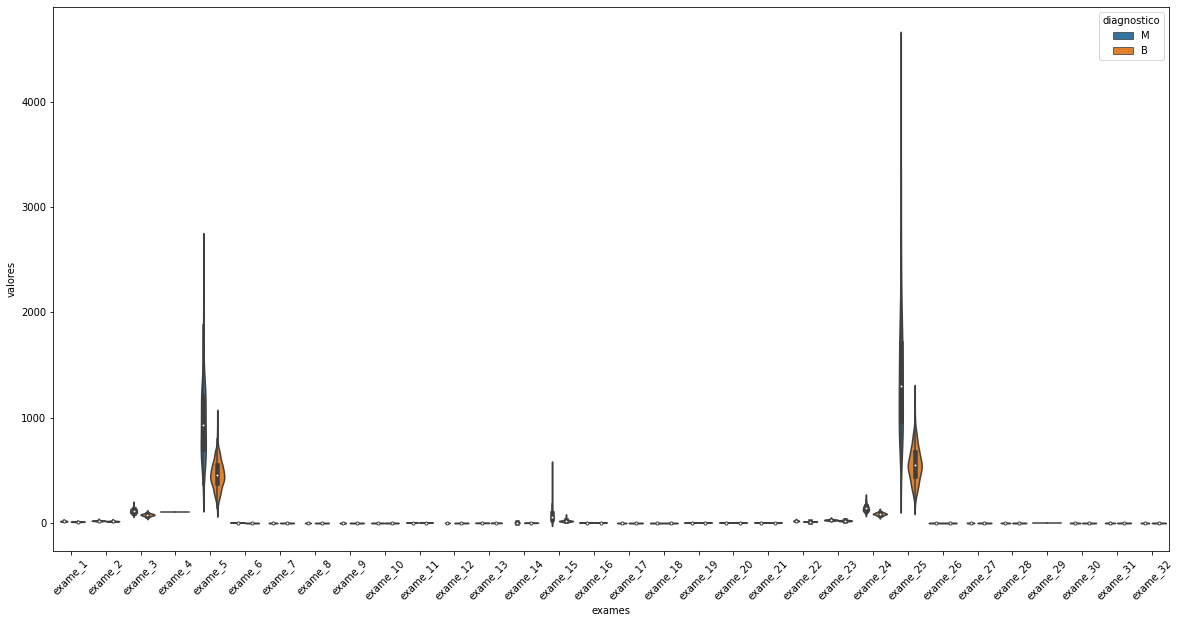

In [62]:
sns.violinplot(x = 'exames', y = 'valores', hue = 'diagnostico', data = dados_plot)
plt.xticks(rotation = 45)

*Visualização péssima...*

In [63]:
padronizador = StandardScaler()
padronizador.fit(x)
dados_plot = padronizador.transform(x)
dados_plot

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [64]:
dados_plot = pd.DataFrame(data = dados_plot, columns = x.keys())
dados_plot['diagnostico'] = y
dados_plot = pd.melt(dados_plot, id_vars = 'diagnostico', var_name = 'exames', value_name = 'valores')
dados_plot.head()

,diagnostico,exames,valores
0,M,exame_1,1.097064
1,M,exame_1,1.829821
2,M,exame_1,1.579888
3,M,exame_1,-0.768909
4,M,exame_1,1.750297


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 <a list of 32 Text major ticklabel objects>)

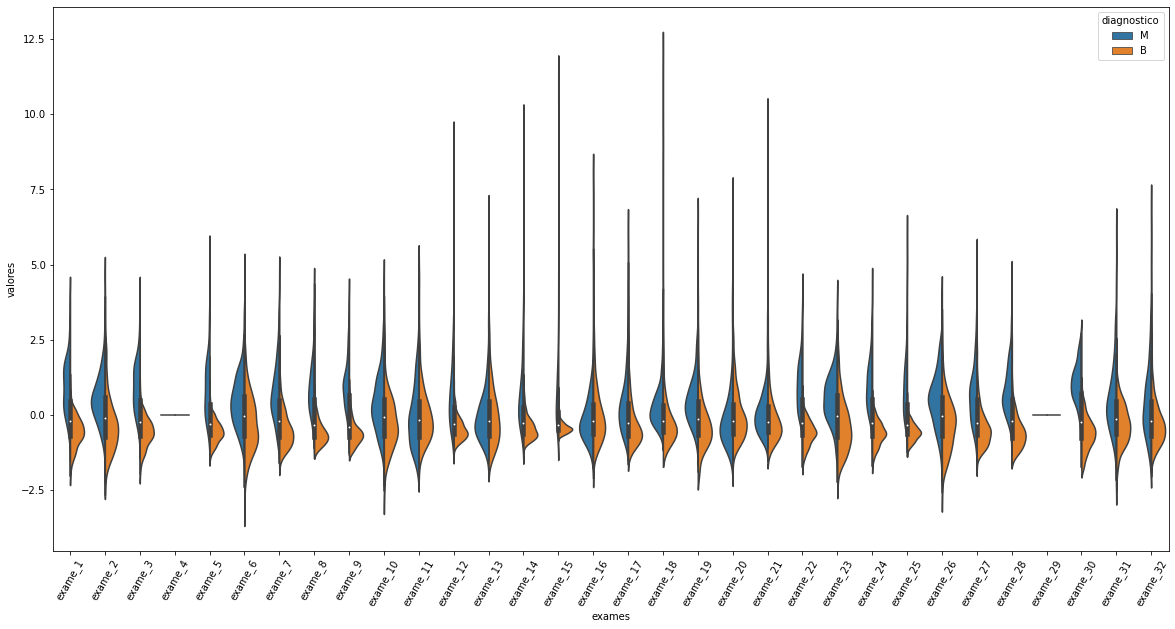

In [65]:
sns.violinplot(x = 'exames', y = 'valores', hue = 'diagnostico', data = dados_plot, split = True) # Split é necessário para separar os dois
plt.xticks(rotation = 60) 

In [66]:
dados['exame_4'] # Constante... Não serve pra nada

0      103.78
1      103.78
2      103.78
3      103.78
4      103.78
        ...  
564    103.78
565    103.78
566    103.78
567    103.78
568    103.78
Name: exame_4, Length: 569, dtype: float64

In [67]:
x = dados.drop(['id', 'diagnostico', 'exame_4', 'exame_29'], axis = 1)
x.head()

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,...,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [68]:
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.3)
model = RandomForestClassifier(n_estimators=100)
model.fit(treino_x, treino_y)
predicao = model.predict(teste_x)

acuracia = accuracy_score(teste_y, predicao) * 100
recall = recall_score(teste_y, predicao, pos_label = 'M') * 100 # COnsiderei o maligno como sendo mais importante
print(f'A acurácia foi de {acuracia:.2f} % e o recall foi de {recall:.2f} %')

<ipython-input-68-2f3607492dde>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(treino_x, treino_y)


A acurácia foi de 95.91 % e o recall foi de 95.24 %


## Creating a correlation matrix

In [69]:
matriz_correlacao = x.corr() # Matriz de correlação entre os exames
matriz_correlacao

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,...,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
exame_1,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
exame_2,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
exame_3,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
exame_5,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
exame_6,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
exame_7,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
exame_8,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
exame_9,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
exame_10,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
exame_11,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


Heat Map é uma matriz de correlação também!

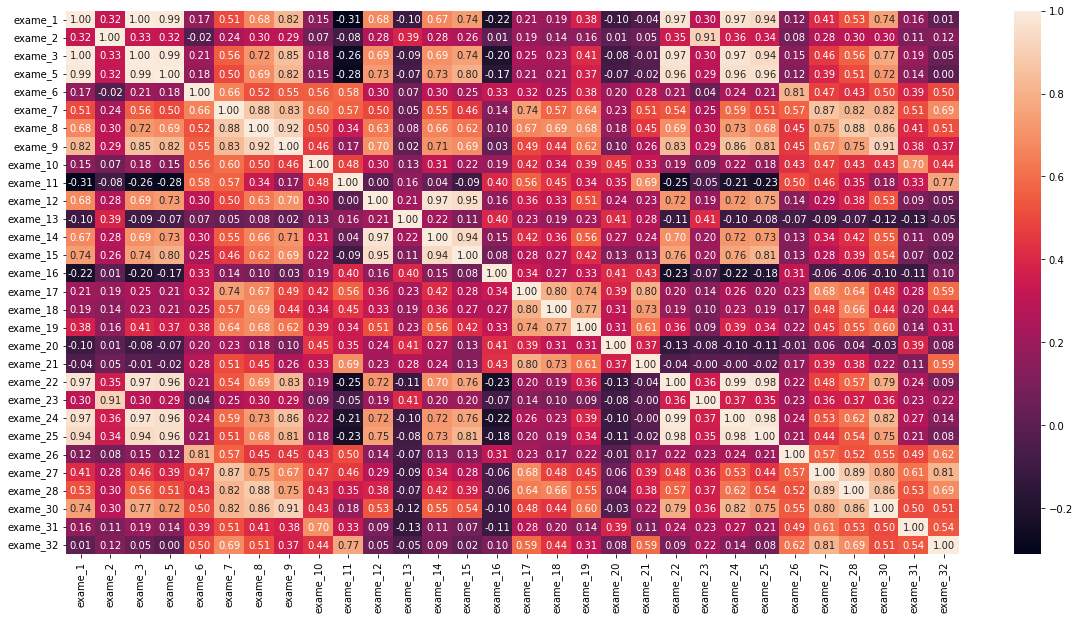

In [70]:
sns.heatmap(matriz_correlacao, annot = True, fmt = '.2f')
# sns.set(font_scale = 4)

Os exames que tem correlação muito próxima de 1 ou 1, são redundantes

In [71]:
filtro = matriz_correlacao[matriz_correlacao > 0.99]
filtro

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,...,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
exame_1,1.000000,NaN,0.997855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_3,0.997855,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_5,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_6,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_7,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_8,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
filtro.sum()[filtro.sum() > 1] # Exame 1 está correlacionado com o exame 3 e o exame 22 está correlacionada com o exame 24

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

In [73]:
x = x.drop(['exame_3', 'exame_22'], axis = 1)

In [90]:
SEED = 1231323
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.3)
treino_y = ravel(treino_y)
teste_y = ravel(teste_y)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.3)
model = RandomForestClassifier(n_estimators=100)
model.fit(treino_x, treino_y)
predicao = model.predict(teste_x)

acuracia = accuracy_score(teste_y, predicao) * 100
recall = recall_score(teste_y, predicao, pos_label = 'M') * 100 # COnsiderei o maligno como sendo mais importante
print(f'A acurácia foi de {acuracia:.2f} % e o recall foi de {recall:.2f} %')

<ipython-input-90-378de91c9b55>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(treino_x, treino_y)


A acurácia foi de 94.15 % e o recall foi de 93.55 %


We can choose the best features

## Let's try to reduce drastically the dimensionality of the dataset

### Select KBest

In [75]:
from sklearn.feature_selection import SelectKBest

In [76]:
# Precisamos também passar uma função pra que ele trabalhe
from sklearn.feature_selection import chi2
selecao = SelectKBest(chi2, k = 5) # Dos 32, ele irá selecionar os 5 melhores
selecao

SelectKBest(k=5, score_func=<function chi2 at 0x7f9b50f4dca0>)

In [77]:
SEED = 1231323
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.3)

selecao.fit(treino_x, treino_y)
treino_Kb = selecao.transform(treino_x)
teste_Kb = selecao.transform(teste_x)

In [78]:
treino_Kb.shape

(398, 5)

In [79]:
SEED = 1231323
random.seed(SEED)

model = RandomForestClassifier(n_estimators=100)
model.fit(treino_Kb, treino_y)
predicao = model.predict(teste_Kb)

acuracia = accuracy_score(teste_y, predicao) * 100
recall = recall_score(teste_y, predicao, pos_label = 'M') * 100 # Considerei o maligno como sendo mais importante
print(f'A acurácia foi de {acuracia:.2f} % e o recall foi de {recall:.2f} %')

A acurácia foi de 91.23 % e o recall foi de 85.94 %


<ipython-input-79-90d10fec88e4>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(treino_Kb, treino_y)


The accuracy have been reduced, but the dimensinality fell drastically

### RFE method

In [80]:
# Outro método, RFE (Remove os que tem menor acurácia individual até que sobre o número de elementos selecionados)
from sklearn.feature_selection import RFE
from numpy import ravel

SEED = 1231323
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.3)
treino_y = ravel(treino_y)
teste_y = ravel(teste_y)

model = RandomForestClassifier(n_estimators=100)
model.fit(treino_x, treino_y)
selecao = RFE(estimator = model, n_features_to_select = 5, step = 1)
selecao.fit(treino_x, treino_y)
treino_RFE = selecao.transform(treino_x)
teste_RFE = selecao.transform(teste_x)

model = RandomForestClassifier(n_estimators=100)
model.fit(treino_RFE, treino_y)
predicao = model.predict(teste_RFE)

acuracia = accuracy_score(teste_y, predicao) * 100
recall = recall_score(teste_y, predicao, pos_label = 'M') * 100 # Considerei o maligno como sendo mais importante
print(f'A acurácia foi de {acuracia:.2f} % e o recall foi de {recall:.2f} %')

A acurácia foi de 93.57 % e o recall foi de 92.19 %


The accuracy also have been reduced, but not so much.

### RFECV method

In [81]:
# Outro método, RFECV (Que faz vários blocos de RFE)
# Ele é MUITO efetivo
from sklearn.feature_selection import RFECV
from numpy import ravel

SEED = 1231323
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.3)
treino_y = ravel(treino_y)
teste_y = ravel(teste_y)

model = RandomForestClassifier(n_estimators=100)
model.fit(treino_x, treino_y)
selecao = RFECV(estimator = model, cv = 5, step = 1, scoring = 'accuracy')
selecao.fit(treino_x, treino_y)
treino_RFECV = selecao.transform(treino_x)
teste_RFECV = selecao.transform(teste_x)

model = RandomForestClassifier(n_estimators=100)
model.fit(treino_RFECV, treino_y)
predicao = model.predict(teste_RFECV)

acuracia = accuracy_score(teste_y, predicao) * 100
recall = recall_score(teste_y, predicao, pos_label = 'M') * 100 # Considerei o maligno como sendo mais importante
print(f'A acurácia foi de {acuracia:.2f} % e o recall foi de {recall:.2f} %')

A acurácia foi de 95.32 % e o recall foi de 92.19 %


Wow, the accuracy went good, but what features have it selected?

In [82]:
selecao.support_

array([ True,  True,  True, False,  True,  True,  True, False, False,
        True, False,  True,  True, False, False,  True, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [92]:
x.columns[selecao.support_]

Index(['exame_1', 'exame_2', 'exame_5', 'exame_7', 'exame_8', 'exame_9',
       'exame_12', 'exame_14', 'exame_15', 'exame_18', 'exame_21', 'exame_23',
       'exame_24', 'exame_25', 'exame_26', 'exame_27', 'exame_28', 'exame_30',
       'exame_31', 'exame_32'],
      dtype='object')

## Showing the scores of each of the medical exams

In [84]:
pontuacao = pd.DataFrame(selecao.grid_scores_)
pontuacao = pontuacao.transpose().mean()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


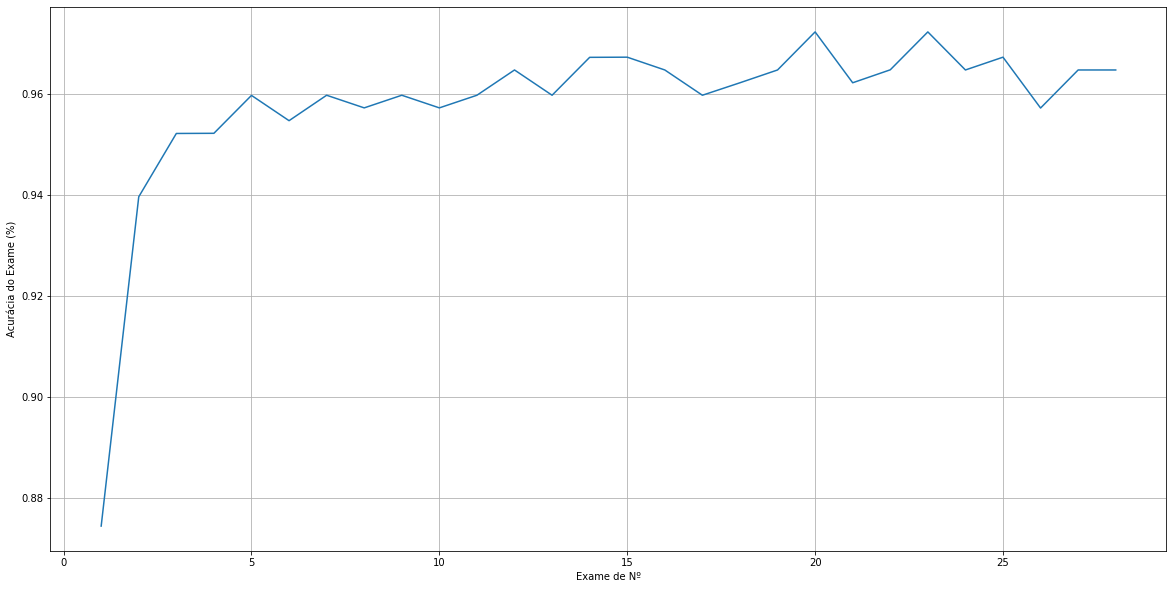

In [85]:
plt.xlabel('Exame de Nº')
plt.ylabel('Acurácia do Exame (%)')
plt.plot(range(1, len(pontuacao) + 1), pontuacao)
plt.grid()
plt.show()

## Reducing the dimensionality graphically (with PCA and TSNE)

In [86]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2) # Para poder se plotar aqui
pca_escalado = pca.fit_transform(x)

In [87]:
pca_escalado # Reduzido a duas dimensões!

array([[1159.75027075, -293.81497938],
       [1268.4366696 ,   15.9187208 ],
       [ 995.0440323 ,   39.07542032],
       ...,
       [ 314.10908205,   47.32017054],
       [1123.82109104,   33.68011504],
       [-770.42429548,  -87.76609028]])

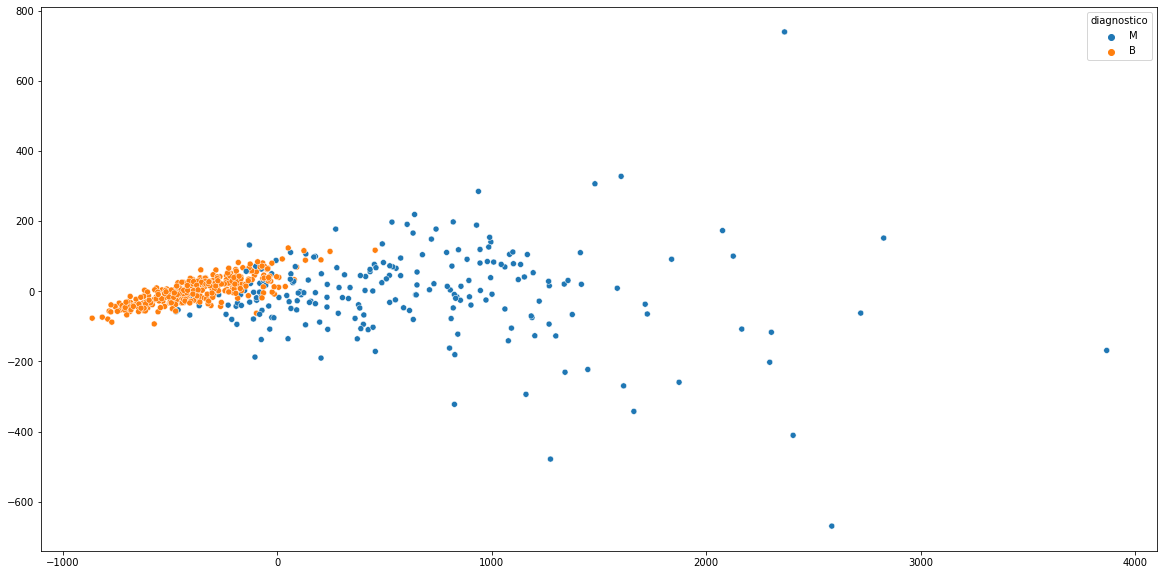

In [88]:
sns.scatterplot(x = pca_escalado[:,0], y = pca_escalado[:,1], hue = y['diagnostico'])

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


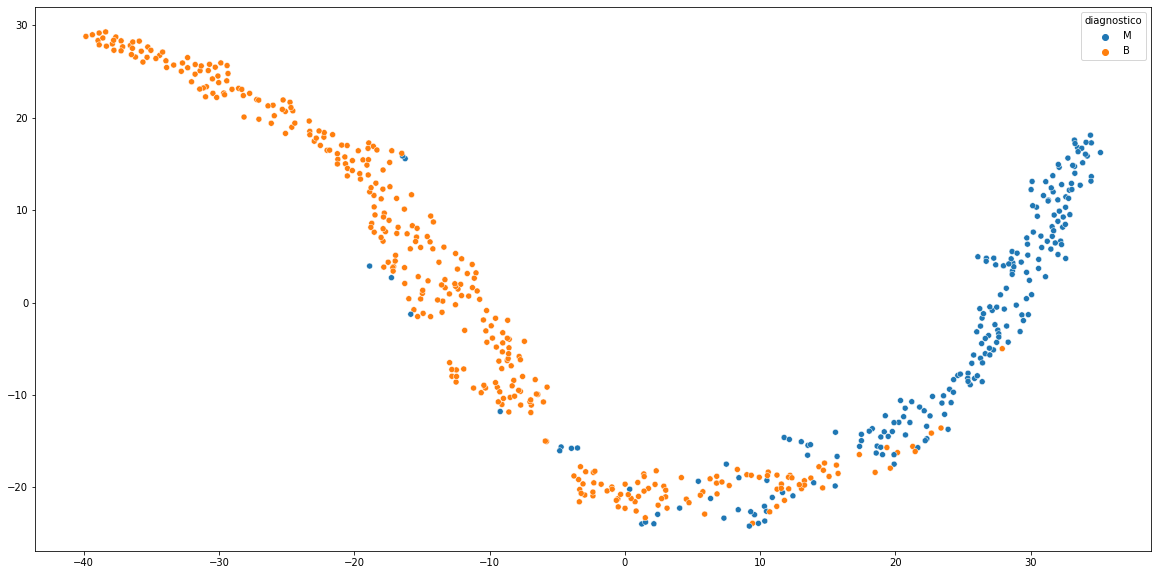

In [89]:
from sklearn.manifold import TSNE

SEED = 1231323
random.seed(SEED)

escalador = StandardScaler()
escalador.fit(x, y)
escalador.transform(x)

tsne = TSNE(n_components = 2) # Para poder se plotar aqui
tsne_escalado = tsne.fit_transform(x)
sns.scatterplot(x = tsne_escalado[:,0], y = tsne_escalado[:,1], hue = y['diagnostico'])

Scalled, they went better